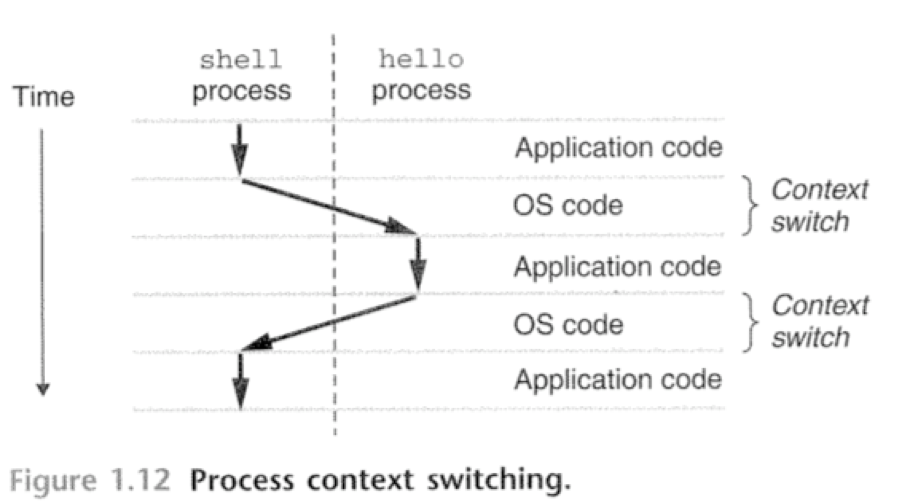# OS Abstractions Processes and Threads

From the Mattson textbook, we have the following concepts:
* _Task_: sequence of instructions that operate as a group
* Unit of execution (_UE_): process or a thread, the execution context for a task
* Processing Element (_PE_): hardware element that runs the UE

For OpenMP these were
* _Task_ == Block invocation or loop iteration
* _UE_ == Thread
* _PE_ == Processor core

But, we haven't formally defined _thread_.  So, let's look at Operating System abstractions.

## Processes

“A process is the operating system’s abstraction for a running program” (Bryant and O’Halloran, _Computer Systems_.)
Processes “provide the illusion that the program is the only one running on the system.”
* Each process appears:
  * To have exclusive use of the hardware
  * To execute instructions one after another without interruption
* By definition, processes do not share memory

The process abstraction allows for multiple serial programs to run concurrently and in parallel when parallel hardware is available.  Processes have their roots in [Time Sharing](https://en.wikipedia.org/wiki/Time-sharing) operating systems of the 1960s.

Each process has a __context__: the information needed for the operating system to implement its abstraction.
* Context is the per process state maintained by the OS
  * Needed to suspend and resume processes
  * Includes: program counter, register file, contents of memory

In a _context switch_ an operating system transparently switches among the running processes.

<img src="images/oscontext.png" width=512 title="from Bryant and O'Halloran....I think" />

### Virtual Memory

* As part of the abstraction, processes appear to have exclusive use of memory:
  * It’s actually a virtual address space, because the addresses don’t correspond to HW addresses
* Memory contains the state of a single program
  * Code, data, heap, stack
  * Memory mapped (shared) libraries
  
 <img src="images/osvm.png" width=384 title="from Bryant and O'Halloran....I think" />

  
### Advantages and Disadvantages

* No shared state!
  * Applications that need to share state, must do so explicitly using inter-process communication (IPC)
  * E.g. RPC, sockets, shmem (shared memory area). message passing
  * All interfaces are clunky.
* No shared state, means no dependencies
  * Simple parallel programs
  * Run the same program on lots of PEs


## Threads

A __thread__ is a concurrent execution unit within a process
* Threads share memory (entire virtual address space)
* Threads have their own, lightweigth context
  * thread identifier, stack, registers, instruction pointer
  * lighter than process (does not include contents of memory)
  
<img src="http://cocoadevcentral.com/articles/imgs/multi_thr_mem.png" width=512 title="Thread Memory Layout" />


* Every process has at least one thread.
  * we say the the process execution context is it's thread of execution
  * processes may have many threads (the operating sytem schedules their concurrent/parallel execution)
  
<img src="http://www.cs.miami.edu/home/visser/Courses/CSC322-09S/Content/UNIXProgramming/Threads.JPG" width=512 title="Thread Execution" />

### Advantages/Disadvantages of Threads

Shared variables!
* Easy communication between execution contexts
  * Multiple threads coordinate their actions and share data through reading and writing shared variables
* But, Hidden dependencies hard to debug
  * Variables may be updated by other threads: change from serial mindset
* OOP to the rescue
  * Objects provide encapsulation in support of threading
  * Classes control access to shared data via synchronization, volatile, and atomic language features 
  
Design priniciples:  Map objects to threads.  All data encapsulated in the object is _thread private data_ (analagous to block local data in OpenMP).  All shared data is explicitly handed into objects (by reference) on construction.  Reads and writes to shared data needs to by _synchronized_. 

### Simulataneous Multi-Threading

This is the concept of running multiple threads on each core at the same time.  It's based on the idea that cores actually have multiple (and heterogeneous) units that could (in principle) do different things at the same time.  

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Hyper-threaded_CPU.png/660px-Hyper-threaded_CPU.png" width=256 title="Intel hyperthreading." />


* Intel has _hyper-threading_ an SMT implementation (picture from Wikipedia above)
  * Processor advertises 2 cores to operating system
  * OS schedules two threads on a core at the same time
  * Sometimes you get some speedup (rarely more than 130%)
  
The figure is somewhat confusing.  The front end reorders instructions based on data dependencies. The execution core shows the different processors units (e.g. 2 floating point units, load, store, load address, branch).  The takeaway is that different unit can conduct operations at the same time. Hyperthreading makes it so that the instructions can come from two threads.
  
The consequence is that when your computer says that it has $X$ cores, you achieve good speedup to $X/2$ cores...that happens on dedicate physical cores.  Then, you get worse speedup for $(X/2,X]$ because threads are sharing cores, and then no more speedup.